# Kaggle - TMDB

### Initial EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MILLION = 1000000

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


**Figure out the information available in each column**

In [5]:
train.iloc[0,1]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

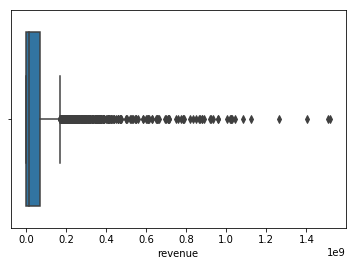

In [7]:
sns.boxplot(train['revenue'])

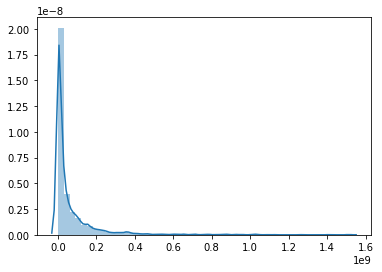

In [11]:
sns.distplot(train['revenue'].values)

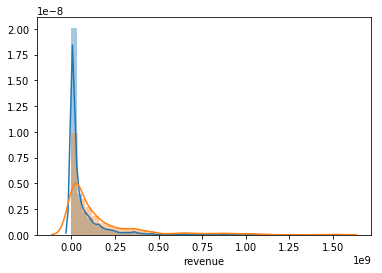

In [12]:
sns.distplot(train[('revenue')])
sns.distplot(train[train['belongs_to_collection'].notnull()]['revenue'])

(0, 500000000)

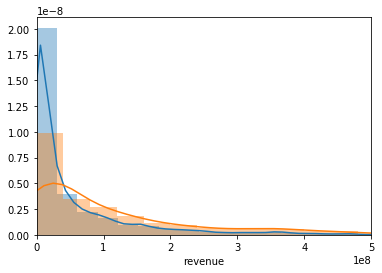

In [13]:
sns.distplot(train[('revenue')])
sns.distplot(train[train['belongs_to_collection'].notnull()]['revenue'])
plt.xlim(0,500000000)

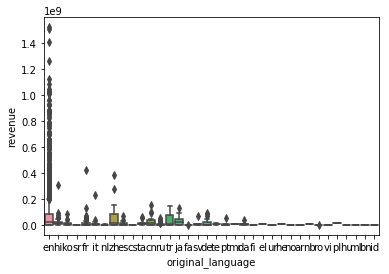

In [14]:
sns.boxplot(x='original_language',y='revenue',data=train)

In [15]:
train[train['belongs_to_collection'].notnull()]['revenue'].mean() / MILLION

159.68693119536422

In [16]:
train[train['belongs_to_collection'].notnull()]['revenue'].median() / MILLION

67.417776

In [17]:
train[train['belongs_to_collection'].isnull()]['revenue'].mean() / MILLION

43.2915898263773

In [18]:
train['revenue'].mean() / MILLION

66.72585188866667

It appears as though the collections are generally more profitable than the other movies

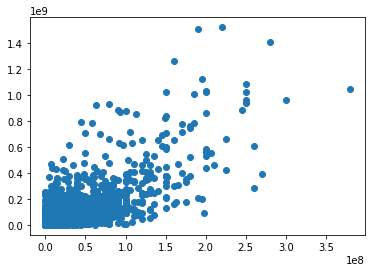

In [19]:
plt.scatter(train['budget'],train['revenue'])

Not very surprising

In [20]:
train['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [21]:
import ast

In [22]:
a = ast.literal_eval(train['genres'][0])
len(a)

1

In [23]:
 ast.literal_eval('0')

0

In [24]:
train['test'] = train['genres'].fillna('[]').map(lambda x : ast.literal_eval(x))
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,test
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[{'id': 35, 'name': 'Comedy'}]"
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[{'id': 18, 'name': 'Drama'}]"
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [25]:
all_genres = train['test'].map(lambda x: [y['id'] for y in x]).values

In [51]:
all_ids = []
for i in all_genres[:]:
    all_ids.extend(i)
all_ids = set(all_ids)

In [52]:
all_ids

{12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10769,
 10770}

In [28]:
train['belongs_to_collection'].fillna('[]').map(lambda x: len(ast.literal_eval(x))).unique()

array([1, 0])

In [29]:
train['belongs_to_collection'].fillna("[{'id':'-2.1'}]").map(lambda x: (ast.literal_eval(x)[0]['id'])).value_counts()

-2.1      2396
645         16
9735         7
937          6
34055        5
9338         5
17255        4
8354         4
8091         4
1575         4
5039         4
8650         4
10455        4
41437        4
9485         4
4246         3
151          3
122123       3
4563         3
87118        3
46512        3
74508        3
295          3
2366         3
453993       3
90863        3
173344       3
86110        3
263          3
1709         3
          ... 
94899        1
158391       1
167613       1
115776       1
90306        1
264914       1
416468       1
184977       1
86668        1
2602         1
43563        1
122945       1
106784       1
468552       1
136214       1
10721        1
212562       1
148065       1
91746        1
96871        1
265865       1
217704       1
469613       1
381396       1
288491       1
1565         1
350836       1
449462       1
125570       1
86024        1
Name: belongs_to_collection, Length: 423, dtype: int64

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [31]:
train['hasHomePage'] = train['homepage'].isnull()

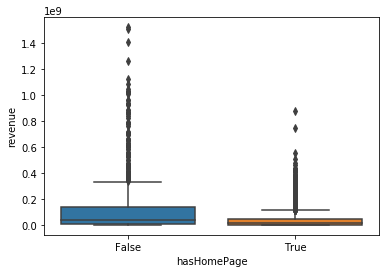

In [32]:
sns.boxplot(x='hasHomePage',y='revenue',data=train)

Maybe

In [35]:
train['overview'].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: overview, dtype: object

In [40]:
train[train['revenue']>500000000]['overview'].head()

46     Diego, Manny and Sid return in this sequel to ...
60     Le Chiffre, a banker to the world's terrorists...
114    Young hobbit Frodo Baggins, after inheriting a...
188    WALL·E is the last robot left on an Earth that...
203    After Homer accidentally pollutes the town's w...
Name: overview, dtype: object

Too complicated to analyze works at this point, maybe I will get back to this later

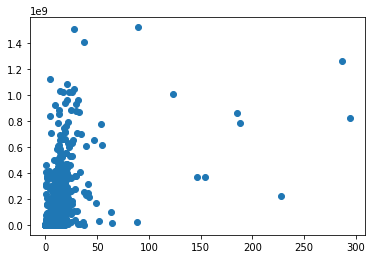

In [43]:
plt.scatter(train['popularity'],train['revenue'])

Probably useful

In [44]:
train['poster_path'].head()

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
Name: poster_path, dtype: object

In [45]:
train['production_companies'].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [47]:
train['production_companies'].fillna("[{'id':'-2.1'}]").map(lambda x: len(ast.literal_eval(x))).unique()

array([ 3,  1,  2,  4,  7,  8, 15,  5,  6, 12,  9, 10, 16, 13, 11, 14, 17])

In [50]:
train['production_companies'].fillna("[{'id':'-2.1'}]").map(lambda x: [i['id'] for i in ast.literal_eval(x)]).head()

0          [4, 60, 8411]
1                    [2]
2    [2266, 3172, 32157]
3                 [-2.1]
4                 [-2.1]
Name: production_companies, dtype: object

In [57]:
prod = train['production_companies'].fillna("[{'id':'-2.1'}]").map(
    lambda x: [i['id'] for i in ast.literal_eval(x)]).values
all_prod = []
for i in prod:
    all_prod.extend(i)
all_prod = set(all_prod)
len(all_prod)

3713

I should probably get the average of each production company and then try to find correlations before deciding what to do with this feature

In [61]:
train['production_countries'].fillna("[{'iso_3166_1':'-2.1'}]").map(lambda x: len(ast.literal_eval(x))).unique()

array([1, 2, 3, 5, 8, 4, 6])

In [63]:
country = train['production_countries'].fillna("[{'iso_3166_1':'-2.1'}]").map(
    lambda x: [i['iso_3166_1'] for i in ast.literal_eval(x)]).values
all_counties = []
for i in country:
    all_counties.extend(i)
all_counties = set(all_counties)
len(all_counties)

75

In [72]:
train['year'] = train['release_date'].map(lambda x : int(x[-2:])+1900 if int(x[-2:])>19 else int(x[-2:])+2000)

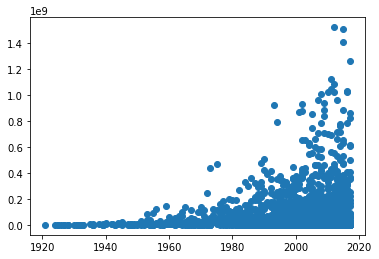

In [78]:
plt.scatter(train['year'],train['revenue'])

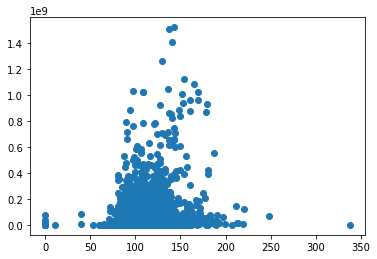

In [79]:
plt.scatter(train['runtime'],train['revenue'])

Doesn't seem to be very informative, try to bin

In [93]:
bins = np.linspace(50, 250, 11)
train['runBin'] = np.digitize(train['runtime'], bins)

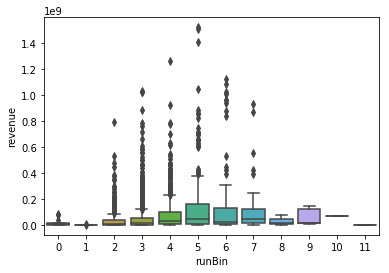

In [98]:
sns.boxplot(train['runBin'],train['revenue'])

In [110]:
spoken = train['spoken_languages'].fillna('[]').map(
    lambda x: ([i['iso_639_1'] for i in ast.literal_eval(x)])).values
all_spoken = []
for i in spoken:
    all_spoken.extend(i)
all_spoken = set(all_spoken)
len(all_spoken)

79

In [116]:
train['spokenHasEn'] = train['spoken_languages'].fillna('[]').map(lambda x: ('en' in [i['iso_639_1'] for i in ast.literal_eval(x)]))

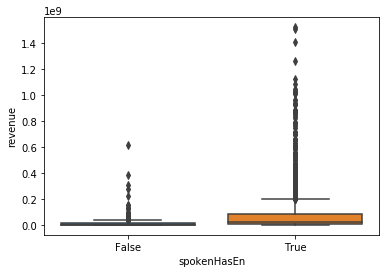

In [117]:
sns.boxplot(train['spokenHasEn'],train['revenue'])

(0, 250000000)

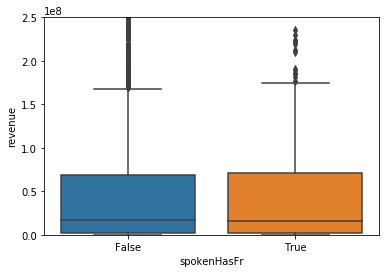

In [119]:
train['spokenHasFr'] = train['spoken_languages'].fillna('[]').map(lambda x: ('fr' in [i['iso_639_1'] for i in ast.literal_eval(x)]))
sns.boxplot(train['spokenHasFr'],train['revenue'])
plt.ylim(0,250000000)

In [123]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [125]:
train[train['status']=='Rumored']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Keywords,cast,crew,revenue,test,hasHomePage,year,runBin,spokenHasEn,spokenHasFr
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,...,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",True,1997,2,True,False
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,...,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,"[{'id': 35, 'name': 'Comedy'}]",True,2011,1,True,False
1216,1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,...,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",True,1986,2,True,False
1618,1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,...,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,"[{'id': 99, 'name': 'Documentary'}]",True,1998,2,True,False


I should probably ditch those points

In [129]:
train['tagline'].head()

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

Too complex, maybe get back to later

In [135]:
train['simple_sequel'] = train['title'].map(lambda x: '2' in x)

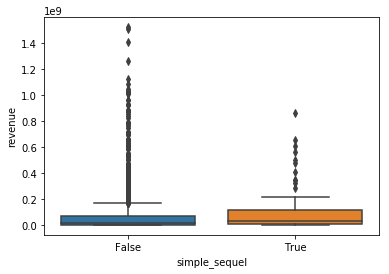

In [136]:
sns.boxplot(train['simple_sequel'],train['revenue'])

sequels might be an indication for success, but this might also be already included in the collections

In [139]:
train[train['simple_sequel']==True].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,cast,crew,revenue,test,hasHomePage,year,runBin,spokenHasEn,spokenHasFr,simple_sequel
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[{'id': 35, 'name': 'Comedy'}]",True,2015,3,True,False,True
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",True,2004,4,True,False,True
19,20,"[{'id': 9518, 'name': 'The Transporter Collect...",32000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0388482,en,Transporter 2,Professional driver Frank Martin is living in ...,11.359659,...,"[{'cast_id': 1, 'character': 'Frank Martin', '...","[{'credit_id': '52fe44e9c3a36847f80b154d', 'de...",85167639,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",True,2005,2,True,True,True
33,34,"[{'id': 207632, 'name': 'The ABCs of Death Col...",0,"[{'id': 27, 'name': 'Horror'}]",NaN,tt2926810,en,ABCs of Death 2,Taking all that was great from the first insta...,8.254856,...,"[{'cast_id': 60, 'character': 'Assassin (Segme...","[{'credit_id': '52fe4cd69251416c91101d73', 'de...",7171,"[{'id': 27, 'name': 'Horror'}]",True,2014,4,True,True,True
83,84,"[{'id': 4438, 'name': 'The Space Odyssey Serie...",28000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",NaN,tt0086837,en,2010,This is a sequel to 2001 A Space Odyssey. It i...,7.482865,...,"[{'cast_id': 10, 'character': 'Dr. Heywood Flo...","[{'credit_id': '52fe43c1c3a36847f806d331', 'de...",40400657,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",True,1984,4,True,False,True


In [140]:
train[train['simple_sequel']==False].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,cast,crew,revenue,test,hasHomePage,year,runBin,spokenHasEn,spokenHasFr,simple_sequel
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[{'id': 18, 'name': 'Drama'}]",False,2014,3,True,False,False
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",False,2012,4,True,False,False
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",True,2009,4,False,False,False
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",True,1987,2,True,False,False
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",False,2012,3,True,False,False


Seems so, I will use collections because it is cleaner

In [146]:
keyw = train['Keywords'].fillna('[]').map(lambda x: [i['id'] for i in ast.literal_eval(x)]).values
all_keys = []
for i in keyw:
    all_keys.extend(i)
all_keys = set(all_keys)
len(all_keys)

7400

I should probably get the average for each keyword and then use that as a feature

In [159]:
# example
train[train['Keywords'].fillna('[]').map(lambda x: 3713 in [i['id'] for i in ast.literal_eval(x)])]['revenue'].mean()/MILLION

73.00371033333333

In [173]:
train['test_3713'] = train['Keywords'].fillna('[]').map(lambda x: [i['name'] for i in ast.literal_eval(x) if i['id']==3713])
train[train['test_3713'].map(lambda x: len(x))>0]['test_3713']

169     [chase]
381     [chase]
604     [chase]
837     [chase]
870     [chase]
935     [chase]
948     [chase]
1181    [chase]
1286    [chase]
1289    [chase]
1367    [chase]
1722    [chase]
1754    [chase]
1833    [chase]
2229    [chase]
2337    [chase]
2462    [chase]
2530    [chase]
2870    [chase]
2908    [chase]
2997    [chase]
Name: test_3713, dtype: object

I will write cleaner code to get the IDs and names for later use

In [182]:
[i['name'] for i in ast.literal_eval(train['cast'].head()[0])][:4]

['Rob Corddry', 'Craig Robinson', 'Clark Duke', 'Adam Scott']

I will find the average revenue for each actor and then average perhaps on the top 3 actors or something like that

In [187]:
ast.literal_eval(train['crew'].head()[0])[0]

{'credit_id': '59ac067c92514107af02c8c8',
 'department': 'Directing',
 'gender': 0,
 'id': 1449071,
 'job': 'First Assistant Director',
 'name': 'Kelly Cantley',
 'profile_path': None}

I will try to dig out several selected jobs and then try to average their own revenue averages (director, producer, etc)

### The actualy preprocessing will be done in a different notebook to keep the code clean